# Import packages

In [1]:
import numpy as np
import pandas as pd
import torch
import os
import pickle
import sys  
from torch import nn, Tensor

In [2]:
sys.path.insert(0, '/home/jovyan/workspace/g2b2/fshokor/PhD/DL_GP_PhD/Public/DL_Model')
import utils
import training
import models

In [3]:
torch.cuda.is_available()

True

# Load Data

In [4]:
# Phenotypes
pheno = pd.read_csv("/home/jovyan/workspace/g2b2/fshokor/PhD/DL_GP_PhD/Public/Data/Pheno_G0_25K.csv")

# GBLUP predicted Genetic Value
gblup = pd.read_csv("/home/jovyan/workspace/g2b2/fshokor/PhD/DL_GP_PhD/Public/Data/PGV_MTGBLUP_G0_25K.csv")

# True Genetic Value
gv = pd.read_csv('/home/jovyan/workspace/g2b2/fshokor/PhD/DL_GP_PhD/Public/Data/TGV_G0_25K.csv')

# Genotypes
geno = pd.read_csv("/home/jovyan/workspace/g2b2/fshokor/PhD/DL_GP_PhD/Public/Data/Geno_jQTL_25K.txt", sep=' ', header = None)

# Split data

## DLGBLUP Model 

Split data for hybrid DLGBLUP model that use GBLUP prediction to predict a first genetic value than learn the relationship between traits using the phenotypes

In [5]:
train_loader_DLG = utils.GetDataLoaderMT(features = gblup[:20000], 
                                         targets = np.array(pheno)[:20000], 
                                         batch_size = 200)
val_loader_DLG = utils.GetDataLoaderMT(features = gblup[20000:22500], 
                                       targets = np.array(pheno)[20000:22500], 
                                       batch_size = 200)
test_loader_DLG = utils.GetDataLoaderMT(features = gblup[22500:], 
                                        targets = np.array(pheno)[22500:], 
                                        batch_size = 200)

In [6]:
data_loaders_DLG = {"train": train_loader_DLG, "val": val_loader_DLG}

## Common

In [7]:
for data in train_loader_DLG:
    x = data[0]
    y =data[1]
    break

In [8]:
print('Input shape: ', x.shape, ' Output shape: ', y.shape)

Input shape:  torch.Size([200, 6])  Output shape:  torch.Size([200, 6])


In [9]:
device = utils.get_default_device()

In [10]:
devicecpu = torch.device("cpu")

In [11]:
device

device(type='cuda')

# Prediction Model

In [12]:
hidden_layer_1 = 400
hidden_layer_2 = 256
traits_number = len(pheno.columns)

In [13]:
prediction_model = models.DL_DLGBLUP(traits_number, hidden_layer_1, hidden_layer_2)
print(prediction_model)

DL_DLGBLUP(
  (trait2traitnet): Sequential(
    (0): Linear(in_features=6, out_features=400, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=400, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.1)
    (4): Linear(in_features=256, out_features=6, bias=True)
  )
)


## Training

In [14]:
# Count model parameters
utils.count_parameters(prediction_model)

106998

In [15]:
# Define Adam optimizer
optimizer = torch.optim.Adam(prediction_model.parameters(), lr=1e-4)

In [16]:
# Train prediction model and save the history 
history = training.fitTrait2Trait( model = prediction_model, data = data_loaders_DLG, optimizer = optimizer, num_epochs = 100, patience = 10, checkpoint_path = 'checkpoint_DLGBLUP.pt', device = device)

Starting Training ...
Starting epoch 1


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 3.9201
Validation loss decreased (inf --> 3.920135).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 3.2318
Starting epoch 2


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.7101
Validation loss decreased (3.920135 --> 2.710126).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.6442
Starting epoch 3


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5861
Validation loss decreased (2.710126 --> 2.586116).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5962
Starting epoch 4


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5675
Validation loss decreased (2.586116 --> 2.567455).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5819
Starting epoch 5


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5566
Validation loss decreased (2.567455 --> 2.556636).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5711
Starting epoch 6


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5478
Validation loss decreased (2.556636 --> 2.547818).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5617
Starting epoch 7


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5399
Validation loss decreased (2.547818 --> 2.539935).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5531
Starting epoch 8


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5327
Validation loss decreased (2.539935 --> 2.532730).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5453
Starting epoch 9


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5259
Validation loss decreased (2.532730 --> 2.525943).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5383
Starting epoch 10


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5198
Validation loss decreased (2.525943 --> 2.519769).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5321
Starting epoch 11


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5145
Validation loss decreased (2.519769 --> 2.514467).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5270
Starting epoch 12


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5102
Validation loss decreased (2.514467 --> 2.510184).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5228
Starting epoch 13


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5069
Validation loss decreased (2.510184 --> 2.506885).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5195
Starting epoch 14


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5043
Validation loss decreased (2.506885 --> 2.504295).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5169
Starting epoch 15


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5024
Validation loss decreased (2.504295 --> 2.502350).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5148
Starting epoch 16


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.5009
Validation loss decreased (2.502350 --> 2.500850).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5130
Starting epoch 17


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4996
Validation loss decreased (2.500850 --> 2.499596).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5116
Starting epoch 18


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4986
Validation loss decreased (2.499596 --> 2.498617).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5103
Starting epoch 19


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4978
Validation loss decreased (2.498617 --> 2.497807).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5091
Starting epoch 20


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4971
Validation loss decreased (2.497807 --> 2.497116).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5081
Starting epoch 21


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4965
Validation loss decreased (2.497116 --> 2.496547).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5071
Starting epoch 22


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4960
Validation loss decreased (2.496547 --> 2.496041).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5062
Starting epoch 23


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4955
Validation loss decreased (2.496041 --> 2.495550).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5053
Starting epoch 24


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4952
Validation loss decreased (2.495550 --> 2.495171).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5045
Starting epoch 25


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4948
Validation loss decreased (2.495171 --> 2.494842).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5038
Starting epoch 26


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4946
Validation loss decreased (2.494842 --> 2.494572).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5031
Starting epoch 27


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4943
Validation loss decreased (2.494572 --> 2.494316).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5024
Starting epoch 28


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4941
Validation loss decreased (2.494316 --> 2.494127).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5017
Starting epoch 29


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4940
Validation loss decreased (2.494127 --> 2.493952).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5012
Starting epoch 30


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4938
Validation loss decreased (2.493952 --> 2.493814).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5006
Starting epoch 31


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4937
Validation loss decreased (2.493814 --> 2.493655).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.5000
Starting epoch 32


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4936
Validation loss decreased (2.493655 --> 2.493553).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4995
Starting epoch 33


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4935
Validation loss decreased (2.493553 --> 2.493481).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4991
Starting epoch 34


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4934
Validation loss decreased (2.493481 --> 2.493425).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4986
Starting epoch 35


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4934
Validation loss decreased (2.493425 --> 2.493365).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4982
Starting epoch 36


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4933
Validation loss decreased (2.493365 --> 2.493341).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4978
Starting epoch 37


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4933
Validation loss decreased (2.493341 --> 2.493304).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4974
Starting epoch 38


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4933
EarlyStopping counter: 1 out of 10


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4970
Starting epoch 39


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4933
EarlyStopping counter: 2 out of 10


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4966
Starting epoch 40


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4934
EarlyStopping counter: 3 out of 10


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4962
Starting epoch 41


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4934
EarlyStopping counter: 4 out of 10


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4959
Starting epoch 42


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4934
EarlyStopping counter: 5 out of 10


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4956
Starting epoch 43


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4934
EarlyStopping counter: 6 out of 10


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4952
Starting epoch 44


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4935
EarlyStopping counter: 7 out of 10


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4949
Starting epoch 45


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4935
EarlyStopping counter: 8 out of 10


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4946
Starting epoch 46


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4936
EarlyStopping counter: 9 out of 10


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.4943
Starting epoch 47


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.4936
EarlyStopping counter: 10 out of 10
Early stopping


## Plot loss

In [17]:
history.keys()

dict_keys(['mse_loss1', 'val_mse_loss1', 'train_epoch_mse_loss1', 'val_epoch_mse_loss1'])

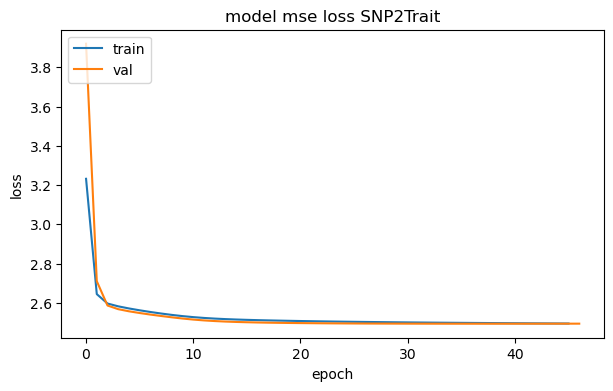

In [18]:
utils.plot_learning_curve(history['mse_loss1'], history['val_mse_loss1'], 'model mse loss SNP2Trait')

## Prediction

In [19]:
utils.to_device(prediction_model,devicecpu)

DL_DLGBLUP(
  (trait2traitnet): Sequential(
    (0): Linear(in_features=6, out_features=400, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=400, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.1)
    (4): Linear(in_features=256, out_features=6, bias=True)
  )
)

In [21]:
res_test = utils.PredictBV(prediction_model, test_loader_DLG)
res_train = utils.PredictBV(prediction_model, train_loader_DLG)
res_val = utils.PredictBV(prediction_model, val_loader_DLG)

## Evaluation

In [38]:
# prediction evaluation between the TGV and the results of Trait2Trait module
utils.evaluateMT(gv.iloc[22500:], res_test[0])

Correlation   MSE  Slope  Standard error  Variance Real  Variance GEBV
0         0.96  0.47   0.94            0.01           5.72           6.03
1         0.97  0.41   0.92            0.00           5.70           6.25
2         0.94  0.72   0.92            0.01           5.73           6.05
3         0.90  1.17   0.91            0.01           5.86           5.71
4         0.96  0.53   0.89            0.01           5.77           6.75
5         0.95  0.59   0.92            0.01           5.77           6.22

In [24]:
# prediction evaluation between the TGV and the results of GBLUP
utils.evaluateMT(gv.iloc[22500:], gblup.iloc[22500:])

Correlation    MSE  Slope  Standard error  Variance Real  Variance GEBV
0         0.97   0.37   0.99            0.01           5.72           5.47
1         0.97   2.73   1.01            0.01           5.70           5.28
2         0.83  11.08   1.00            0.01           5.73           3.99
3         0.83   5.96   1.01            0.01           5.86           4.00
4         0.96  48.14   1.00            0.01           5.77           5.28
5         0.93   0.93   0.97            0.01           5.77           5.32

# Training Mean Model

In [25]:
# Define model
mean_model = models.MeanTrai2Trait(traits_number, hidden_layer_1, hidden_layer_2)
print(mean_model)

MeanTrai2Trait(
  (meantrait2traitnet): Sequential(
    (0): Linear(in_features=1, out_features=400, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=400, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.1)
    (4): Linear(in_features=256, out_features=6, bias=True)
  )
)


In [26]:
# Split data into three set, the input is the predicted genetic value of first (reference) trait of SNP2Trait module 
train_loader_mean = utils.GetDataLoaderMT(features = res_train[0].iloc[:, 0], 
                                         targets = np.array(pheno)[:20000], 
                                         batch_size = 200)
val_loader_mean = utils.GetDataLoaderMT(features = res_val[0].iloc[:, 0], 
                                       targets = np.array(pheno)[20000:22500], 
                                       batch_size = 200)
test_loader_mean = utils.GetDataLoaderMT(features = res_test[0].iloc[:, 0], 
                                        targets = np.array(pheno)[22500:], 
                                        batch_size = 200)

In [27]:
data_loaders_mean = {"train": train_loader_mean, "val": val_loader_mean}

In [28]:
utils.count_parameters(mean_model)

104998

In [29]:
optimizer_mean = torch.optim.Adam(mean_model.parameters(), lr=1e-4)

In [30]:
history_mean = training.fitMeanTrait2Trait( model = mean_model, data = data_loaders_mean, optimizer = optimizer_mean, num_epochs = 100, patience = 10, checkpoint_path = 'checkpoint_mean.pt', device = device)

Starting Training ...
Starting epoch 1


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 3.9131
Validation loss decreased (inf --> 3.913091).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 3.2732
Starting epoch 2


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9982
Validation loss decreased (3.913091 --> 2.998168).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9735
Starting epoch 3


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9325
Validation loss decreased (2.998168 --> 2.932529).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9314
Starting epoch 4


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9132
Validation loss decreased (2.932529 --> 2.913228).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9217
Starting epoch 5


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9087
Validation loss decreased (2.913228 --> 2.908660).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9193
Starting epoch 6


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9070
Validation loss decreased (2.908660 --> 2.906976).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9182
Starting epoch 7


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9061
Validation loss decreased (2.906976 --> 2.906112).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9175
Starting epoch 8


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9056
Validation loss decreased (2.906112 --> 2.905628).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9171
Starting epoch 9


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9054
Validation loss decreased (2.905628 --> 2.905374).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9167
Starting epoch 10


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9052
Validation loss decreased (2.905374 --> 2.905197).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9165
Starting epoch 11


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9051
Validation loss decreased (2.905197 --> 2.905113).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9163
Starting epoch 12


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9050
Validation loss decreased (2.905113 --> 2.905028).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9161
Starting epoch 13


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9050
Validation loss decreased (2.905028 --> 2.905014).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9160
Starting epoch 14


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9050
Validation loss decreased (2.905014 --> 2.904971).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9159
Starting epoch 15


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9049
Validation loss decreased (2.904971 --> 2.904940).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9157
Starting epoch 16


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9049
Validation loss decreased (2.904940 --> 2.904918).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9157
Starting epoch 17


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9049
Validation loss decreased (2.904918 --> 2.904916).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9156
Starting epoch 18


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9049
Validation loss decreased (2.904916 --> 2.904898).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9155
Starting epoch 19


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9049
Validation loss decreased (2.904898 --> 2.904882).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9154
Starting epoch 20


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9049
Validation loss decreased (2.904882 --> 2.904867).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9153
Starting epoch 21


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9049
Validation loss decreased (2.904867 --> 2.904860).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9152
Starting epoch 22


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9048
Validation loss decreased (2.904860 --> 2.904836).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9152
Starting epoch 23


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9048
Validation loss decreased (2.904836 --> 2.904823).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9151
Starting epoch 24


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9048
Validation loss decreased (2.904823 --> 2.904821).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9150
Starting epoch 25


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9048
Validation loss decreased (2.904821 --> 2.904811).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9149
Starting epoch 26


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9048
Validation loss decreased (2.904811 --> 2.904797).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9149
Starting epoch 27


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9048
Validation loss decreased (2.904797 --> 2.904768).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9148
Starting epoch 28


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9048
Validation loss decreased (2.904768 --> 2.904758).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9148
Starting epoch 29


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9047
Validation loss decreased (2.904758 --> 2.904747).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9147
Starting epoch 30


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9047
Validation loss decreased (2.904747 --> 2.904730).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9146
Starting epoch 31


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9047
Validation loss decreased (2.904730 --> 2.904667).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9146
Starting epoch 32


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9046
Validation loss decreased (2.904667 --> 2.904592).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9145
Starting epoch 33


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9046
Validation loss decreased (2.904592 --> 2.904554).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9145
Starting epoch 34


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9045
Validation loss decreased (2.904554 --> 2.904521).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9144
Starting epoch 35


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9045
Validation loss decreased (2.904521 --> 2.904488).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9144
Starting epoch 36


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9044
Validation loss decreased (2.904488 --> 2.904444).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9143
Starting epoch 37


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9044
Validation loss decreased (2.904444 --> 2.904424).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9143
Starting epoch 38


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9044
Validation loss decreased (2.904424 --> 2.904380).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9142
Starting epoch 39


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9043
Validation loss decreased (2.904380 --> 2.904339).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9142
Starting epoch 40


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9043
Validation loss decreased (2.904339 --> 2.904299).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9141
Starting epoch 41


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9043
Validation loss decreased (2.904299 --> 2.904271).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9141
Starting epoch 42


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9042
Validation loss decreased (2.904271 --> 2.904237).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9140
Starting epoch 43


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9042
Validation loss decreased (2.904237 --> 2.904202).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9140
Starting epoch 44


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9042
Validation loss decreased (2.904202 --> 2.904179).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9139
Starting epoch 45


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9041
Validation loss decreased (2.904179 --> 2.904144).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9139
Starting epoch 46


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9041
Validation loss decreased (2.904144 --> 2.904110).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9139
Starting epoch 47


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9041
Validation loss decreased (2.904110 --> 2.904074).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9138
Starting epoch 48


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9040
Validation loss decreased (2.904074 --> 2.904028).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9138
Starting epoch 49


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9040
Validation loss decreased (2.904028 --> 2.903996).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9137
Starting epoch 50


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9040
Validation loss decreased (2.903996 --> 2.903957).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9137
Starting epoch 51


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9039
Validation loss decreased (2.903957 --> 2.903923).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9136
Starting epoch 52


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9039
Validation loss decreased (2.903923 --> 2.903890).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9136
Starting epoch 53


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9038
Validation loss decreased (2.903890 --> 2.903844).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9136
Starting epoch 54


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9038
Validation loss decreased (2.903844 --> 2.903822).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9135
Starting epoch 55


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9038
Validation loss decreased (2.903822 --> 2.903781).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9135
Starting epoch 56


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9037
Validation loss decreased (2.903781 --> 2.903741).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9135
Starting epoch 57


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9037
Validation loss decreased (2.903741 --> 2.903695).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9134
Starting epoch 58


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9037
EarlyStopping counter: 1 out of 10


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9134
Starting epoch 59


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9036
Validation loss decreased (2.903695 --> 2.903624).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9134
Starting epoch 60


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9036
Validation loss decreased (2.903624 --> 2.903602).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9133
Starting epoch 61


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9036
EarlyStopping counter: 1 out of 10


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9133
Starting epoch 62


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9035
Validation loss decreased (2.903602 --> 2.903538).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9133
Starting epoch 63


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9035
Validation loss decreased (2.903538 --> 2.903507).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9132
Starting epoch 64


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9035
Validation loss decreased (2.903507 --> 2.903487).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9132
Starting epoch 65


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9035
Validation loss decreased (2.903487 --> 2.903463).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9132
Starting epoch 66


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9034
Validation loss decreased (2.903463 --> 2.903443).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9131
Starting epoch 67


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9034
Validation loss decreased (2.903443 --> 2.903398).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9131
Starting epoch 68


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9034
Validation loss decreased (2.903398 --> 2.903379).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9131
Starting epoch 69


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9034
Validation loss decreased (2.903379 --> 2.903354).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9130
Starting epoch 70


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9033
Validation loss decreased (2.903354 --> 2.903325).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9130
Starting epoch 71


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9033
Validation loss decreased (2.903325 --> 2.903302).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9130
Starting epoch 72


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9033
Validation loss decreased (2.903302 --> 2.903265).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9130
Starting epoch 73


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9032
Validation loss decreased (2.903265 --> 2.903240).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9129
Starting epoch 74


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9032
Validation loss decreased (2.903240 --> 2.903184).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9129
Starting epoch 75


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9032
Validation loss decreased (2.903184 --> 2.903170).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9129
Starting epoch 76


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9031
Validation loss decreased (2.903170 --> 2.903134).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9129
Starting epoch 77


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9031
Validation loss decreased (2.903134 --> 2.903112).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9128
Starting epoch 78


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9031
Validation loss decreased (2.903112 --> 2.903091).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9128
Starting epoch 79


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9030
Validation loss decreased (2.903091 --> 2.903048).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9128
Starting epoch 80


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9030
Validation loss decreased (2.903048 --> 2.903037).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9128
Starting epoch 81


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9030
Validation loss decreased (2.903037 --> 2.902991).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9127
Starting epoch 82


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9030
Validation loss decreased (2.902991 --> 2.902969).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9127
Starting epoch 83


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9029
Validation loss decreased (2.902969 --> 2.902935).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9127
Starting epoch 84


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9029
Validation loss decreased (2.902935 --> 2.902914).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9127
Starting epoch 85


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9029
Validation loss decreased (2.902914 --> 2.902879).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9126
Starting epoch 86


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9028
Validation loss decreased (2.902879 --> 2.902840).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9126
Starting epoch 87


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9028
Validation loss decreased (2.902840 --> 2.902815).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9126
Starting epoch 88


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9028
Validation loss decreased (2.902815 --> 2.902784).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9126
Starting epoch 89


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9027
Validation loss decreased (2.902784 --> 2.902738).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9126
Starting epoch 90


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9027
Validation loss decreased (2.902738 --> 2.902722).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9125
Starting epoch 91


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9027
Validation loss decreased (2.902722 --> 2.902681).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9125
Starting epoch 92


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9027
Validation loss decreased (2.902681 --> 2.902656).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9125
Starting epoch 93


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9026
Validation loss decreased (2.902656 --> 2.902623).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9125
Starting epoch 94


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9026
Validation loss decreased (2.902623 --> 2.902602).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9124
Starting epoch 95


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9026
Validation loss decreased (2.902602 --> 2.902574).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9124
Starting epoch 96


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9026
Validation loss decreased (2.902574 --> 2.902556).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9124
Starting epoch 97


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9026
Validation loss decreased (2.902556 --> 2.902553).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9124
Starting epoch 98


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9025
Validation loss decreased (2.902553 --> 2.902499).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9124
Starting epoch 99


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9025
Validation loss decreased (2.902499 --> 2.902498).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9123
Starting epoch 100


  0%|          | 0/13 [00:00<?, ?it/s]

val: 	mse_loss1: 2.9025
Validation loss decreased (2.902498 --> 2.902460).  Saving model ...


  0%|          | 0/100 [00:00<?, ?it/s]

train: 	mse_loss1: 2.9123
Training process complete in 2m 43s


## Prediction

In [31]:
utils.to_device(mean_model,devicecpu)

MeanTrai2Trait(
  (meantrait2traitnet): Sequential(
    (0): Linear(in_features=1, out_features=400, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=400, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.1)
    (4): Linear(in_features=256, out_features=6, bias=True)
  )
)

In [32]:
res3_test = pd.DataFrame(utils.PredictBV(mean_model, test_loader_mean)[0])

# PLots

PLots pf relationship between the reference trait and all dependent traits

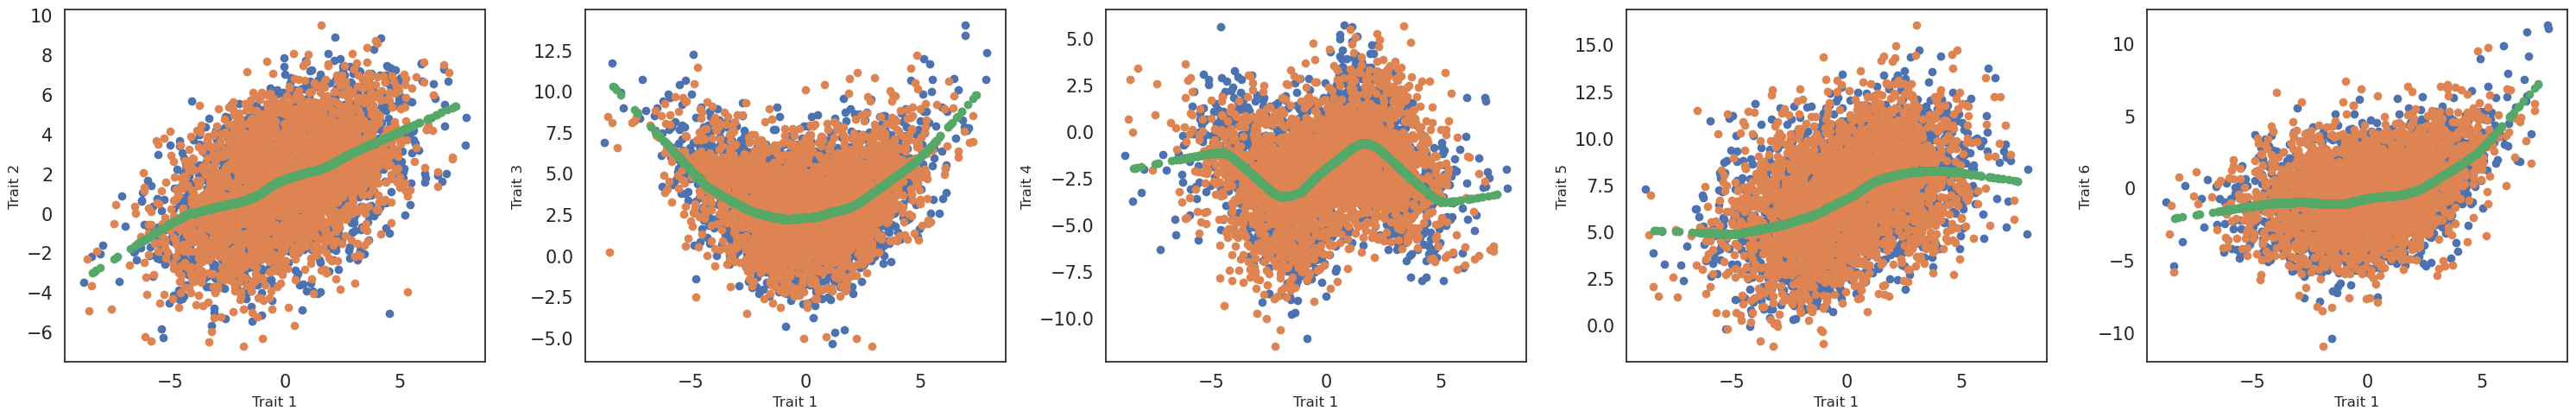

In [33]:
# True Genetic Value Value, predicted genetic value Trait2Trait, predicted mean relationship 
utils.plot_Traits(gv.iloc[22500:], res_test[0], res3_test)

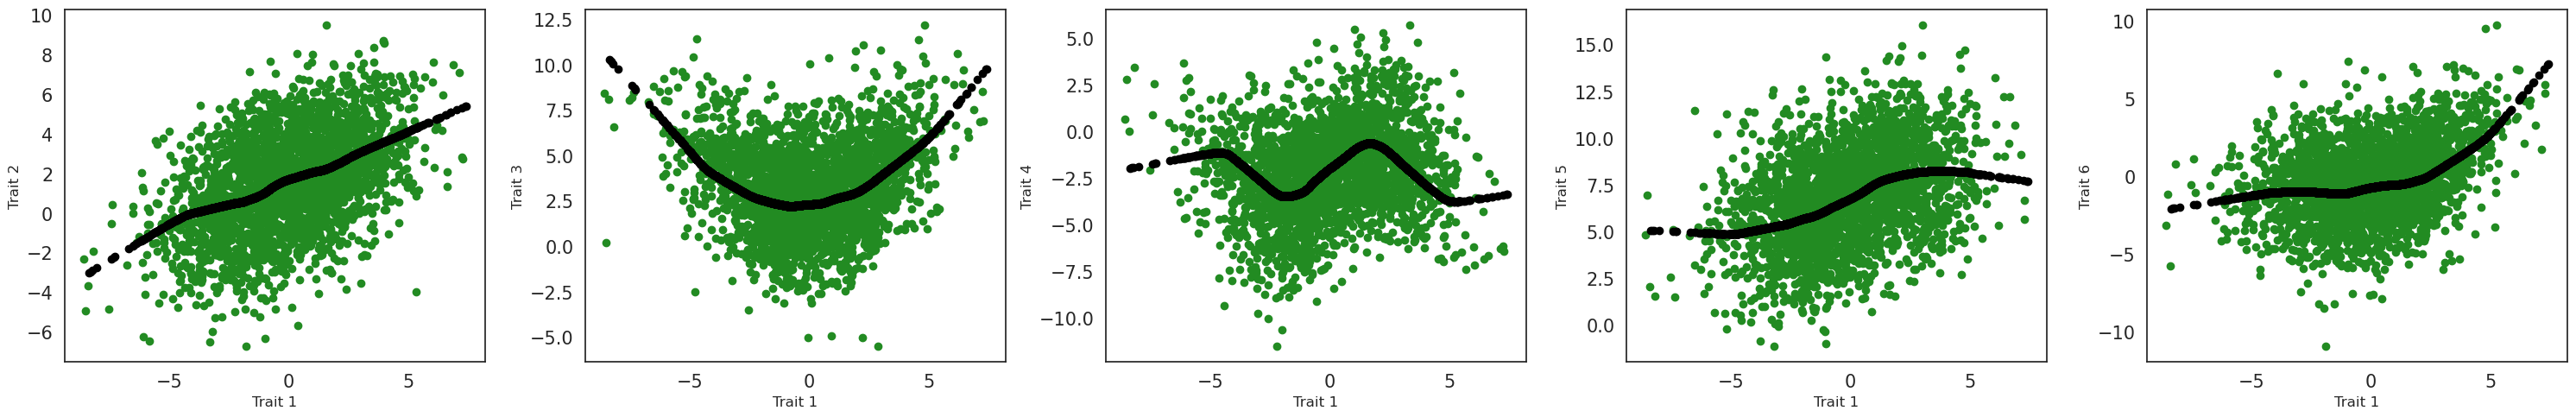

In [34]:
# predicted genetic value Trait2Trait, predicted mean relationship 
utils.plot_Traits(res_test[0], res3_test, colors=['forestgreen', 'black'])

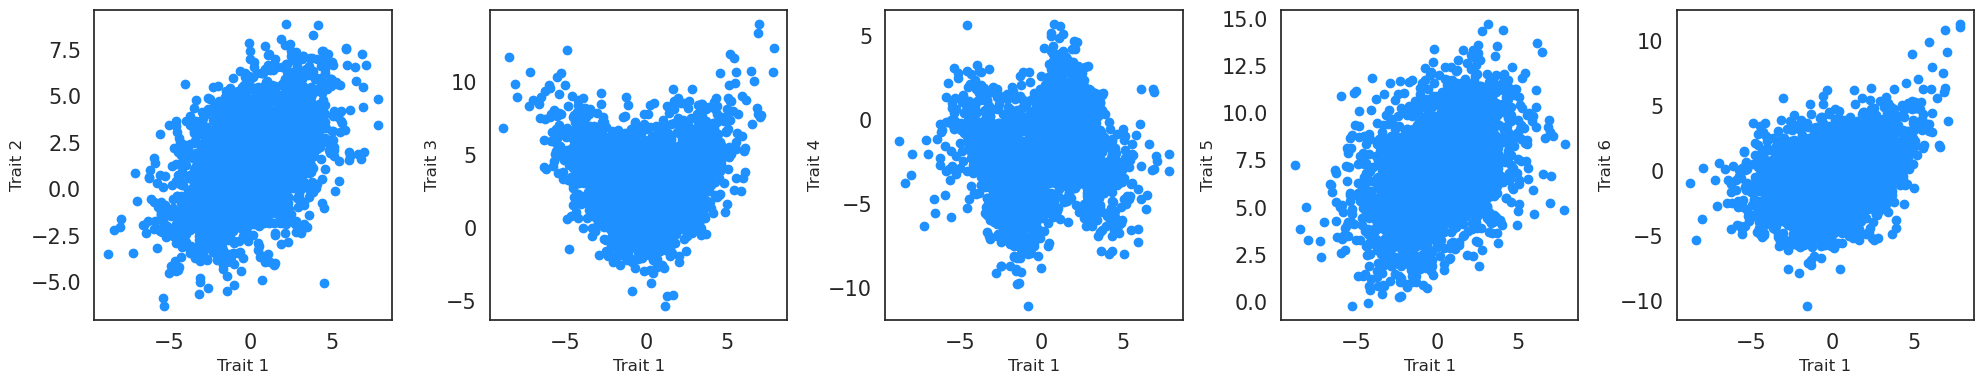

In [35]:
# True genetic value Trait2Trait
utils.plot_Traits(gv.iloc[22500:], colors=['dodgerblue'], plot_size=(20, 4))

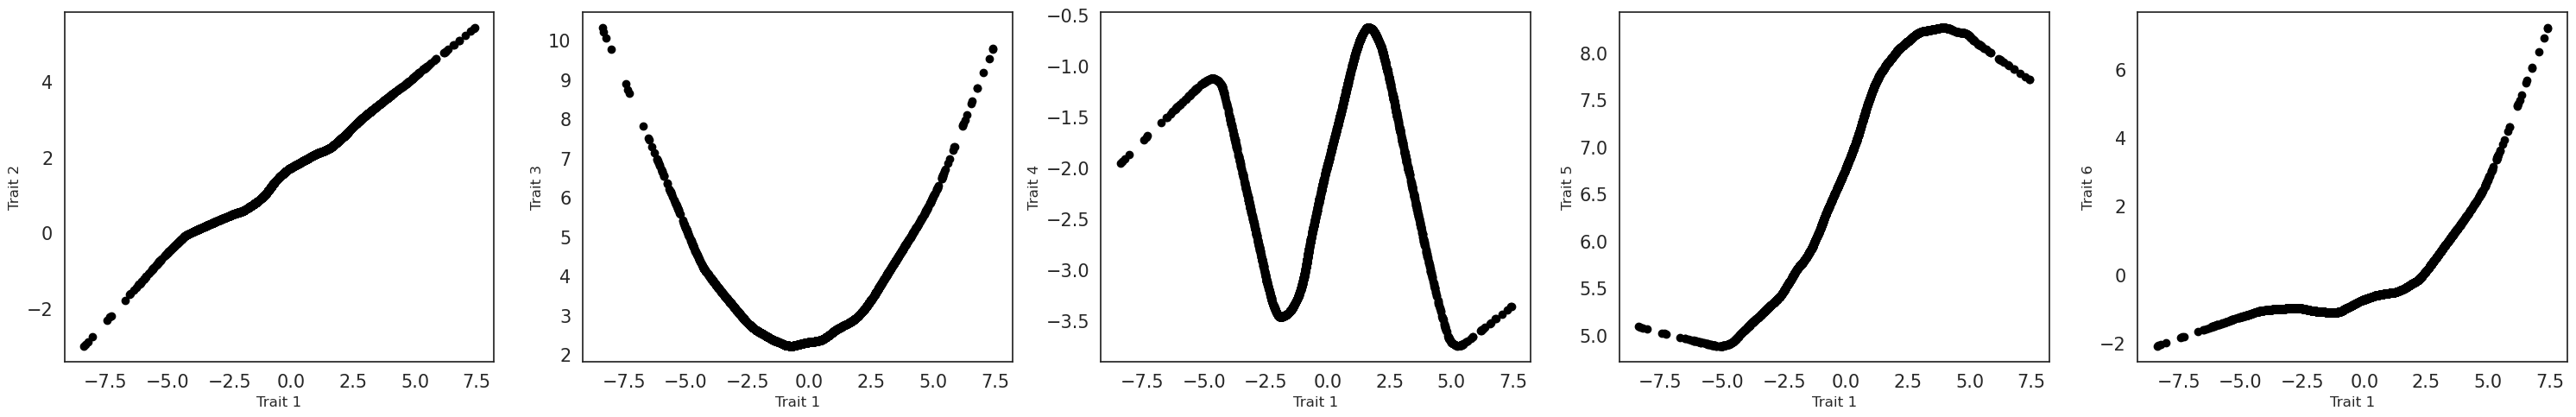

In [36]:
# predicted mean relationship 
utils.plot_Traits(res3_test, colors=['black'])

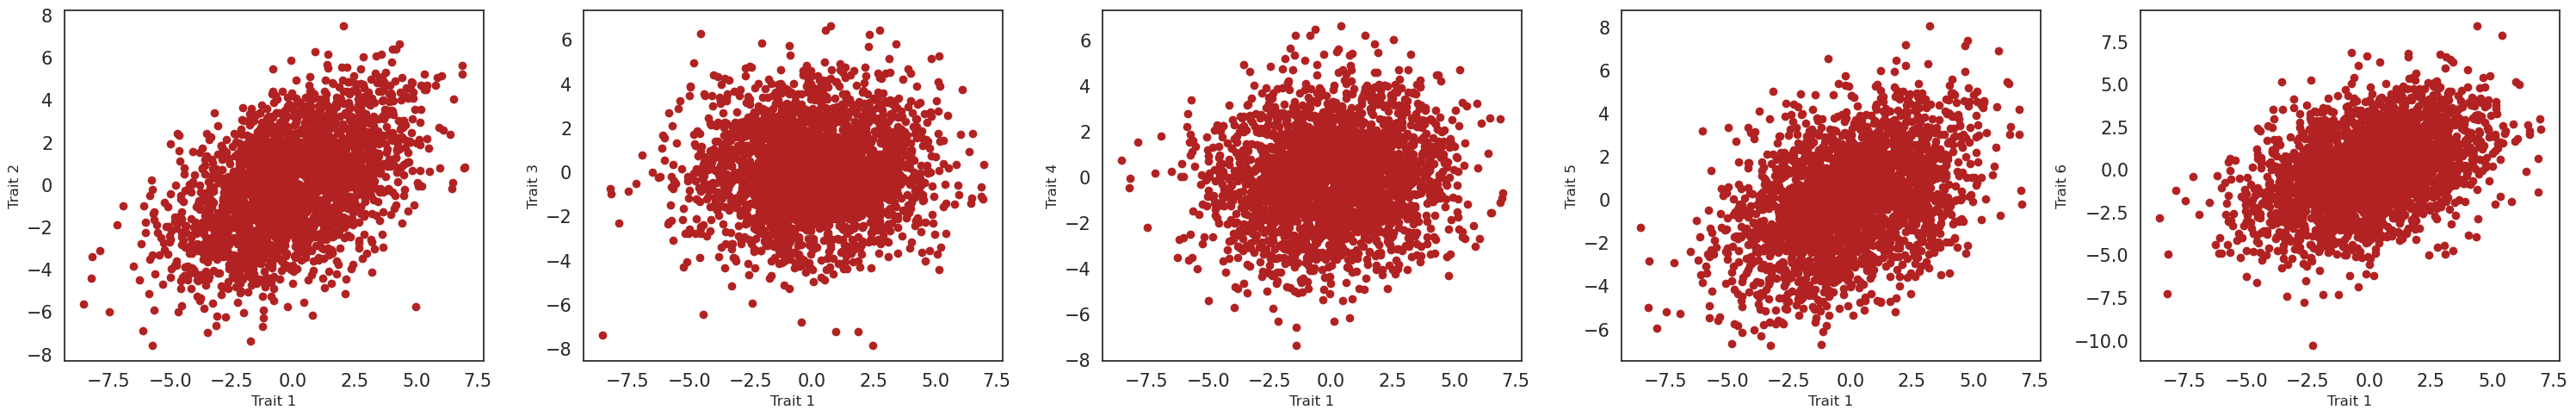

In [37]:
# predicted genetic value GBLUP
utils.plot_Traits(gblup[22500:], colors=['firebrick'])